   # Aprendizaje NO supervisado
   
## Clustering

Se utiliza cuando no se conoce la etiqueta

Ejemplos: 

> 1. Movimientos bancarios.
2. Textos.
3. Palabras.





In [2]:
# importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster


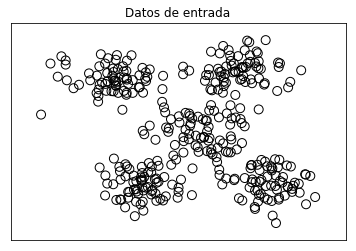

In [10]:
# cargamos los datos

X = np.loadtxt('data_clustering.txt',delimiter = ',')

#visualizamos los datos para observar la dispersión 

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',facecolors = 'none',edgecolors = 'black',s = 80)

#En el eje X la caracteristica 0
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1

#En el eje Y la caracteristica 1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

plt.title('Datos de entrada')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.xticks(())
plt.yticks(())
plt.show()

In [25]:
# definimos el número de clusters o grupos
num_cluster = 5
#generamos el modelo 

#init establece el método de localizacion inicial de los centroides
modelo_kmeans= KMeans(init = 'k-means++',n_clusters = num_cluster, n_init=10)

#entrenar el modelo 
modelo_kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

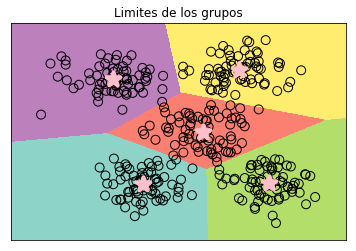

In [37]:
# visualizaos el resultado

#primero definimos el paso de la malla
paso = 0.01

#punto extremos de la malla
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

#Asignamos los valores a la malla
x_vals,y_vals = np.meshgrid(np.arange(x_min,x_max,paso),np.arange(y_min,y_max,paso))

#Predecimos la salida para cada punto de la malla
salida = modelo_kmeans.predict(np.c_[x_vals.ravel(),y_vals.ravel()]) #choricito
salida = salida.reshape(x_vals.shape) #convertir en el 

#figura
plt.figure()
#borrar el contenido de la figura con handle "figure"
plt.clf()

#para definir el fondo
plt.imshow(salida,interpolation='nearest',extent=(x_vals.min(),x_vals.max(),y_vals.min(),y_vals.max()),cmap=plt.cm.Set3,aspect='auto',origin ='lower')

#para hacer las bolitas
plt.scatter(X[:,0],X[:,1],marker='o',facecolors ='none',edgecolors = 'black',s =80)

#centros
centroides = modelo_kmeans.cluster_centers_
#dibujar las bolitas
plt.scatter(centroides[:,0],centroides[:,1],marker = '*',s=210,linewidths = 4,facecolors='pink')

plt.title('Limites de los grupos')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.xticks(())
plt.yticks(())
plt.show()



